In [130]:
#Problem for Anlysis

#With the provided data determine the whether or not the passengers will survive.  I would therorize that more
#women would survive based upon the reasoning that due to the time period it was seen as more important that the 
#surviving parent be the mother as it was theorized women's ability to rear children is innate.  I would also think
#men have tendency act in an unsafe manner whether in jest or under extreme circumstances and therefore would unecessarily endanger 
#themselves and consequently lead to their demise.

In [131]:
#Libraries

import numpy as np #main analysis tool
import pandas as pd #analysis tool built on top of numpy
import seaborn as sns #wrapper for matplot
import matplotlib.pyplot as plt #plotting application
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #statistical modeling including classification, regression, 
                                                    #clustering and dimensionality reduction
from sklearn.metrics import accuracy_score, confusion_matrix #uncertain


In [132]:
#Reading the Data
ship = pd.read_csv('/Users/testuser/Downloads/SQL/train.csv')

In [133]:
ship.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [134]:
ship.shape

#Thats just a little funny how that operation worked out; "ship-shape" Here it can be seen that this is a releativly
#small data set and as we drop columns that will not be useful to the analysis the dataframe will be easier to manipulate


(891, 12)

In [135]:
ship.info()

#In looking at the printed information about the data frame we see that there should be 891 passengers in total
#Where there is a descrpency is in Age, Cabin and those who Embarked on the voyage.  These can currently therorize
#that these descrpancies are attributed to the fact that some passengers are children in the age category and thus
#there ages were not recorded.  Cabins are not in a 1:1 ratio because ideally couples, friends, familys would share.
#Lastly the Embarked can at this time be attributed to error, null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
#Raw Data Tabulation
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
data['Parch'].value_counts()  #omit cannot be deduced how linkage works and can then be useful for overall analysis

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [113]:
ship = ship.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

#These columns are excluded as they do not provide information that is useful to the anlysis of survival based upon
#what the signfy, see classification below.

#Survived - Survival (0 = No; 1 = Yes)
#Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#Name 
#Sex = Male and Female
#Age - 0-90
#sibsp - Number of Siblings/Spouses Aboard, (0 = Alone)
#parch - Number of Parents/Children Aboard
#ticket - Ticket Number
#fare - Passenger Fare
#Cabin
#Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#**N4M: If you want to drop more than on column at once, must use brackets not just parentheses 

In [114]:
ship.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [115]:
ship.shape

(891, 5)

In [116]:
ship['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [117]:
ship['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
ship['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [119]:
ship['Age'].value_counts()
#**N4M: Could I have ordered this in ascending to descending by age?

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [136]:
data['Age'].unique()

#by viewing the array there are null values that will need to be filled in before comparisons can be done

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [137]:
np.mean(ship['Age'])

29.69911764705882

In [138]:
temp_age = ship[ship['Age'].isna() == False]['Age']

In [139]:
mean_age = np.mean(temp_age)

In [140]:
ship['Age'] = ship['Age'].fillna(mean_age)

In [144]:
ship['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [155]:
ship.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
# Categorize Data by Numerical or Categorical for Analysis
numerical = ship[['Age','Survived','Pclass', 'PassengerId' ]]
categorical = ship[['Sex']]

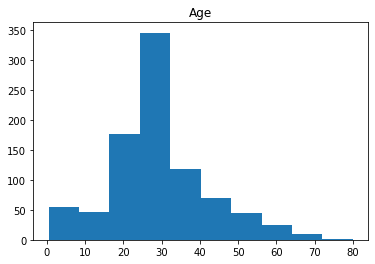

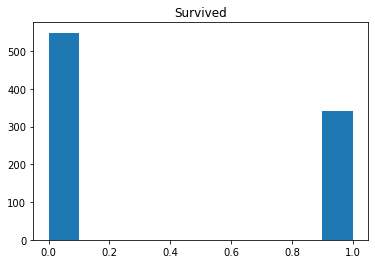

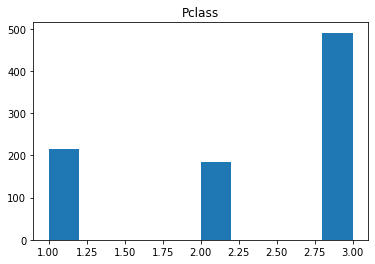

In [167]:
for i in numerical.columns:
    plt.hist(numerical[i])
    plt.title(i)
    plt.show()
    
# Most paasengers were realatively young on this voyage with almost a 1/3 of the passengers being between the ages of 
#25-30 years old.
#It is a staggering statistic that of the almost 900 people on board only a about a 1/3 survived
#Most of the passengers, meaning almost half had 3rd class passenger tickets, assigning them to a specifc part of the
#ship
    
#**N4M: How to insert axis labels, possible for these charts or must x and y be named by columns in the table?

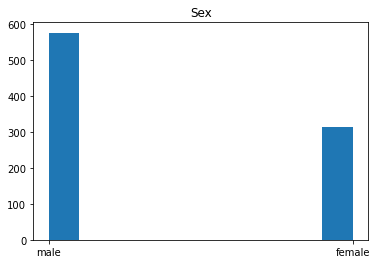

In [165]:
for i in categorical.columns:
    plt.hist(categorical[i])
    plt.title(i)
    plt.show()
    
#From the chart below you can see that there were roughly double the amount of men as passengers aboard the Titantic
#compared to women a 2:1 ratio

In [162]:
#Compare and Contrast Visualzation
#Survived - Survival (0 = No; 1 = Yes)


<AxesSubplot:xlabel='Age', ylabel='Survived'>

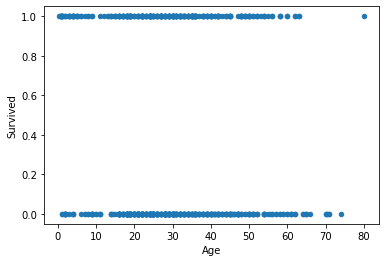

In [182]:

data.plot.scatter('Age', 'Survived')

#the scatterplot is a better representation than the bar chart

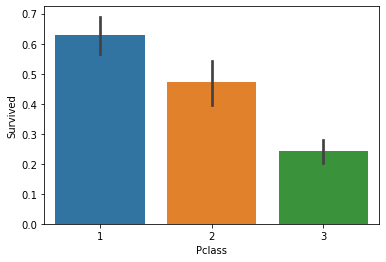

In [177]:
sns.barplot(x="Pclass", y="Survived", data=data)
plt.show()
#It can be reasoned that where you were on the ship impacted a passengers survival rate.  

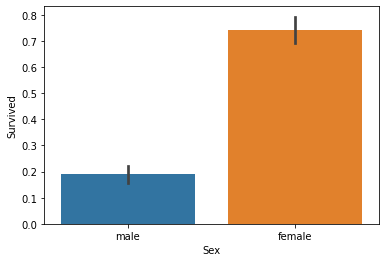

In [181]:
sns.barplot(x="Sex", y="Survived", data=data)
plt.show()
#As originally hypothesized females were more likely to be suviors between the two genders

In [ ]:
#**N4M: We have to make an appointment because you cannot explain why we are doing this, just that it has to be done
#or make a conclusion after this - not understanding

In [199]:
numerical.select_dtypes(np.object)

/var/folders/54/kb1g5s7n5ds6km5w3p2cxbsr0000gq/T/ipykernel_21161/2796546407.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical.select_dtypes(np.object)


""
0
1
2
3
4
...
886
887
888
889


In [201]:
scaled = Normalizer().fit_transform(numerical)
scaled = pd.DataFrame(scaled)

In [202]:
scaled

,0,1,2
0,0.990830,0.000000,0.135113
1,0.999308,0.026298,0.026298
2,0.992685,0.038180,0.114541
3,0.999185,0.028548,0.028548
4,0.996347,0.000000,0.085401
...,...,...,...
886,0.997268,0.000000,0.073872
887,0.997241,0.052486,0.052486
888,0.994937,0.000000,0.100502
889,0.998524,0.038405,0.038405


In [204]:
encoded = OneHotEncoder(drop='first').fit_transform(categorical).toarray()
encoded = pd.DataFrame(encoded) 
encoded

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [205]:
features = pd.concat([scaled, encoded], axis = 1)

In [206]:
features

,0,1,2,0
0,0.990830,0.000000,0.135113,1.0
1,0.999308,0.026298,0.026298,0.0
2,0.992685,0.038180,0.114541,0.0
3,0.999185,0.028548,0.028548,0.0
4,0.996347,0.000000,0.085401,1.0
...,...,...,...,...
886,0.997268,0.000000,0.073872,1.0
887,0.997241,0.052486,0.052486,0.0
888,0.994937,0.000000,0.100502,0.0
889,0.998524,0.038405,0.038405,1.0


In [210]:
y = data['Survived']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1, random_state=42)

In [212]:
X_train.shape

(801, 4)

In [213]:
X_test.shape

(90, 4)

In [214]:
model = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

In [215]:
predictions = model.predict(X_test)

In [216]:
accuracy_score(y_test, predictions)

0.8111111111111111

In [217]:
y_test.value_counts()

0    54
1    36
Name: Survived, dtype: int64

In [218]:
confusion_matrix(y_test, predictions)

array([[45,  9],
       [ 8, 28]])

In [219]:
pd.Series(predictions).value_counts()

0    53
1    37
dtype: int64

In [221]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [224]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [226]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80124224 0.74375    0.85       0.7625     0.81875   ]
0.7952484472049689


In [ ]:
#Conclusion

#As seen in the figures above the model with new paramters set is only off by the 2% from the accuracy model created
#in class.  As in class  modeling showed 82% and my model shows 80.12%